# SVD(特異値分解)

In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

In [3]:
# -1〜+1の間に規格化
def normalize(score):
    norm = (score-score.min())/(score.max()-score.min()) # 0-1に規格化
    norm = norm * 2
    norm = norm - np.mean(norm, axis=0)
    return norm

In [4]:
# 位相整列の実装(指導教員から提供された関数)
def alignment(x):
    fft = np.fft.fft(x)
    fft_phase = np.angle(fft)
    fft_abs = np.abs(fft)[:-1] # -1はあったほうが良さそう。
    disp = fft_phase[np.argmax(fft_abs)] * len(x) / (2 * np.pi)
    disp = int(- disp) % len(x)
    return np.tile(x, 2)[disp:disp+len(x)]

In [5]:
# 使うデータは1049冊分の小説データの感情スコア値
SCORE_PATH = 'data/all_score_1124.csv'

In [6]:
# pandas dataframeとして読み込む
score_df = pd.read_csv(SCORE_PATH, index_col=0)
score_df.head()

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
13,0.025661,0.000000,0.054238,0.066828,0.170504,0.276141,0.331507,0.199721,0.145354,0.078378,...,0.730720,0.769252,0.744509,0.796472,0.747293,0.633655,0.644652,0.587357,0.710778,1.000000
19,0.582563,0.548885,0.555228,0.577744,0.582888,0.640445,0.639444,0.669647,0.633042,0.589699,...,0.581338,0.537401,0.493915,0.504167,0.462203,0.416233,0.410606,0.407270,0.372276,0.337727
24,0.558150,0.573397,0.559897,0.556415,0.527930,0.403733,0.370236,0.465665,0.523025,0.457648,...,0.028671,0.000000,0.009338,0.099273,0.117307,0.078283,0.066041,0.078662,0.093908,0.292288
30,0.630050,0.571001,0.543094,0.548430,0.484186,0.561365,0.504428,0.539505,0.428540,0.503674,...,0.265228,0.422052,0.512738,0.577317,0.593348,0.557535,0.642939,0.603872,0.603872,0.551362
41,0.911461,1.000000,0.947067,0.883412,0.842882,0.885247,0.841734,0.750502,0.746091,0.763377,...,0.377716,0.371480,0.431062,0.443728,0.395934,0.444922,0.424034,0.525714,0.572375,0.650717


In [7]:
scores = score_df.to_numpy()

In [8]:
# 平均値を０にしておく(-1〜1の間に規格化)
A = normalize(scores)
A.shape, round(np.min(A),2), round(np.max(A),2), round(np.mean(A),2)

((1149, 100), -1.11, 1.1, -0.0)

## アライメント前

In [9]:
# 特異値分解(Singular Value Decomposition)
U, s, Vh = np.linalg.svd(A, full_matrices=False)

In [10]:
# 戻り値の形を確認
U.shape, s.shape, Vh.shape

((1149, 100), (100,), (100, 100))

In [11]:
# W は U x Sで求める
W = U * s
W.shape

(1149, 100)

特徴量の抽出

$ A = USV^T = WV^T $

$ V^T $ の行に特徴があらわれる．各行(ベクトル)を mode と呼ぶ．

参考にしたのは先行研究（https://db-event.jpn.org/deim2019/post/papers/350.pdf）

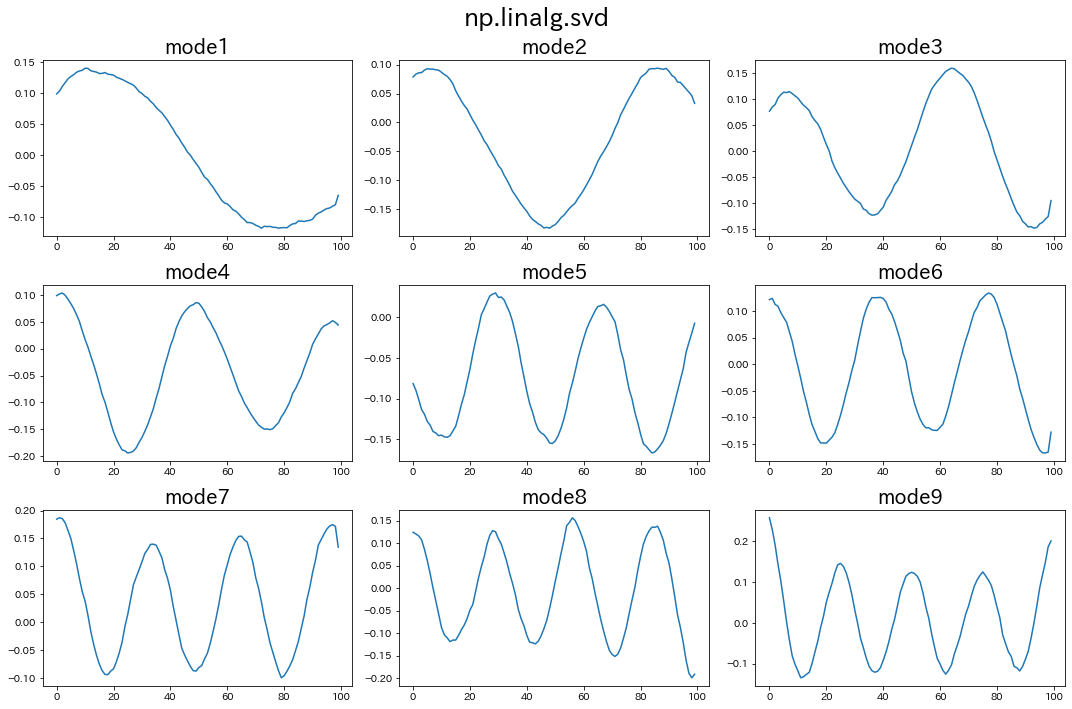

In [12]:
# mode1 - mode9を表示する
plt.figure(figsize=(15, 10))
plt.suptitle('np.linalg.svd', fontsize=25)
for i in range(1, 10):
    ax = plt.subplot(3, 3, i)
    ax.set_title(f'mode{i}', fontsize=20)
    ax.plot(Vh[i-1])
plt.tight_layout()
plt.show()

## アライメント後

In [12]:
# アライメント実行
A_alignment = []
for a in A:
    A_alignment.append(alignment(a))
A_alignment = np.array(A_alignment)

In [13]:
# 特異値分解(Singular Value Decomposition)
U2, s2, Vh2 = np.linalg.svd(A_alignment, full_matrices=False)

In [14]:
# W は U x Sで求める
W2 = U2 * s2
W2.shape

(1149, 100)

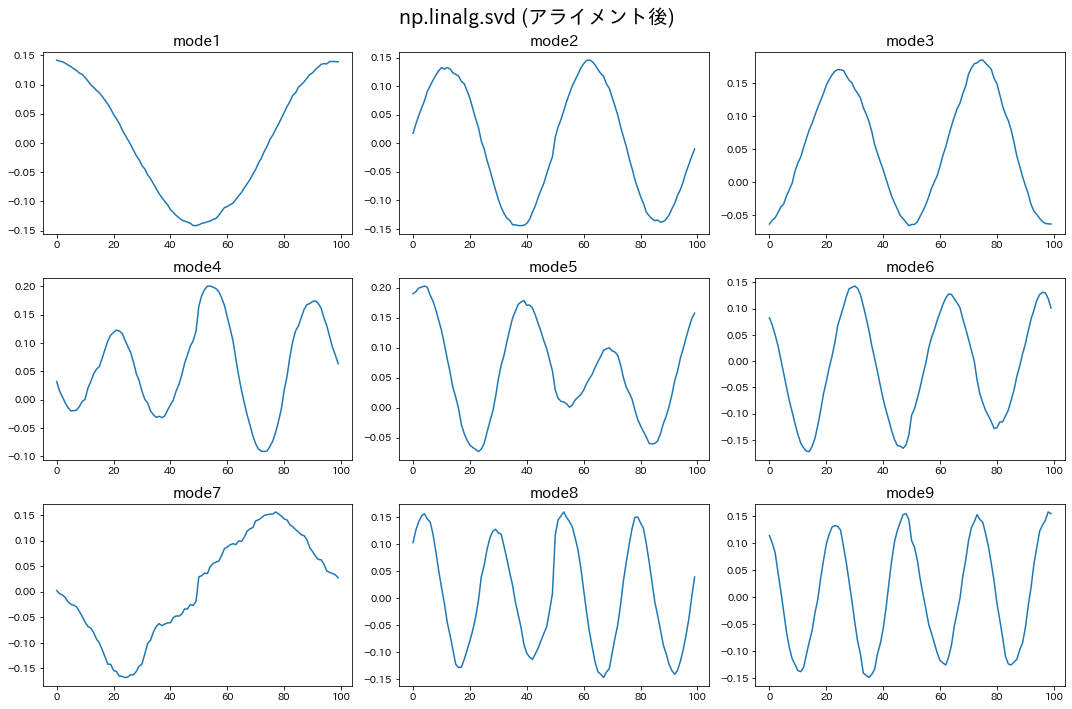

In [15]:
# mode1 - mode9を表示する
plt.figure(figsize=(15, 10))
plt.suptitle('np.linalg.svd (アライメント後)', fontsize=20)
for i in range(1, 10):
    ax = plt.subplot(3, 3, i)
    ax.set_title(f'mode{i}', fontsize=15)
    ax.plot(Vh2[i-1])
    # ax.plot(Vh2_alignment[i-1])
plt.tight_layout()
plt.show()